# Loan Eligibility Prediction

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Loan Dataset.csv')

## Exploratory Data Analysis

In [4]:
df.head(5)

,Applicant_ID,Gender,Age,Marital_Status,Dependents,Education,Employment_Status,Occupation_Type,Residential_Status,City/Town,...,Loan_Amount_Requested,Loan_Term,Loan_Purpose,Interest_Rate,Loan_Type,Co-Applicant,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
0,1,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,2,Male,36,Married,2,High School,Employed,Business,Own,Suburban,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,3,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,4,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,5,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1


In [5]:
df.size

1404000

In [10]:
df.shape

(52000, 27)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Applicant_ID                52000 non-null  int64  
 1   Gender                      52000 non-null  object 
 2   Age                         52000 non-null  int64  
 3   Marital_Status              52000 non-null  object 
 4   Dependents                  52000 non-null  int64  
 5   Education                   52000 non-null  object 
 6   Employment_Status           52000 non-null  object 
 7   Occupation_Type             52000 non-null  object 
 8   Residential_Status          52000 non-null  object 
 9   City/Town                   52000 non-null  object 
 10  Annual_Income               52000 non-null  int64  
 11  Monthly_Expenses            52000 non-null  int64  
 12  Credit_Score                52000 non-null  int64  
 13  Existing_Loans              520

In [14]:
df.describe()

,Applicant_ID,Age,Dependents,Annual_Income,Monthly_Expenses,Credit_Score,Existing_Loans,Total_Existing_Loan_Amount,Outstanding_Debt,Loan_History,Loan_Amount_Requested,Loan_Term,Interest_Rate,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,26000.500000,38.898385,1.498000,83588.474404,2748.064885,678.089019,0.997865,24939.087962,14984.864923,0.198596,21102.765481,125.827019,9.253494,4.503923,17.031808,0.500204,0.641654
std,15011.251336,10.553928,1.118077,35720.851522,1295.678763,159.990367,0.815586,14407.886552,8663.404305,0.398947,8224.940906,65.509959,3.318356,2.872721,7.212011,0.289939,0.479519
min,1.000000,18.000000,0.000000,20009.000000,500.000000,300.000000,0.000000,0.000000,0.000000,0.000000,5000.000000,12.000000,3.500000,0.000000,5.000000,0.000000,0.000000
25%,13000.750000,31.000000,0.000000,55564.000000,1636.000000,553.000000,0.000000,12498.000000,7511.750000,0.000000,16941.750000,69.000000,6.400000,2.000000,11.000000,0.250000,0.000000
50%,26000.500000,38.000000,1.000000,78839.000000,2739.000000,742.000000,1.000000,24964.000000,14984.500000,0.000000,21039.000000,126.000000,9.240000,5.000000,17.000000,0.500000,1.000000
75%,39000.250000,45.000000,2.000000,114226.000000,3866.000000,796.000000,2.000000,37399.500000,22432.250000,0.000000,25809.000000,182.000000,12.140000,7.000000,23.000000,0.750000,1.000000
max,52000.000000,69.000000,3.000000,149998.000000,4999.000000,849.000000,2.000000,49999.000000,29998.000000,1.000000,44848.000000,239.000000,15.000000,9.000000,29.000000,1.000000,1.000000


In [16]:
df.isnull().sum()

Applicant_ID                  0
Gender                        0
Age                           0
Marital_Status                0
Dependents                    0
Education                     0
Employment_Status             0
Occupation_Type               0
Residential_Status            0
City/Town                     0
Annual_Income                 0
Monthly_Expenses              0
Credit_Score                  0
Existing_Loans                0
Total_Existing_Loan_Amount    0
Outstanding_Debt              0
Loan_History                  0
Loan_Amount_Requested         0
Loan_Term                     0
Loan_Purpose                  0
Interest_Rate                 0
Loan_Type                     0
Co-Applicant                  0
Bank_Account_History          0
Transaction_Frequency         0
Default_Risk                  0
Loan_Approval_Status          0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [20]:
df.nunique()

Applicant_ID                  52000
Gender                            2
Age                              52
Marital_Status                    3
Dependents                        4
Education                         3
Employment_Status                 3
Occupation_Type                   4
Residential_Status                3
City/Town                         3
Annual_Income                 42408
Monthly_Expenses               4500
Credit_Score                    450
Existing_Loans                    3
Total_Existing_Loan_Amount    32440
Outstanding_Debt              24717
Loan_History                      2
Loan_Amount_Requested         22433
Loan_Term                       228
Loan_Purpose                      4
Interest_Rate                  1151
Loan_Type                         2
Co-Applicant                      2
Bank_Account_History             10
Transaction_Frequency            25
Default_Risk                    101
Loan_Approval_Status              2
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Applicant_ID                52000 non-null  int64  
 1   Gender                      52000 non-null  object 
 2   Age                         52000 non-null  int64  
 3   Marital_Status              52000 non-null  object 
 4   Dependents                  52000 non-null  int64  
 5   Education                   52000 non-null  object 
 6   Employment_Status           52000 non-null  object 
 7   Occupation_Type             52000 non-null  object 
 8   Residential_Status          52000 non-null  object 
 9   City/Town                   52000 non-null  object 
 10  Annual_Income               52000 non-null  int64  
 11  Monthly_Expenses            52000 non-null  int64  
 12  Credit_Score                52000 non-null  int64  
 13  Existing_Loans              520

### Data Visualization

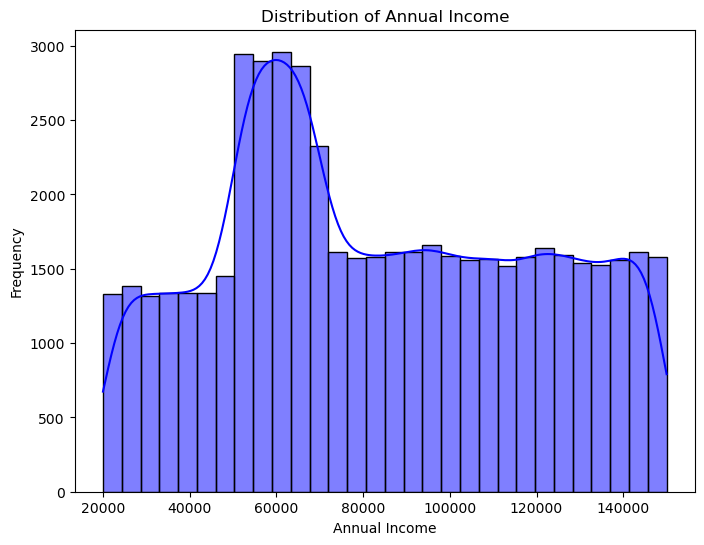

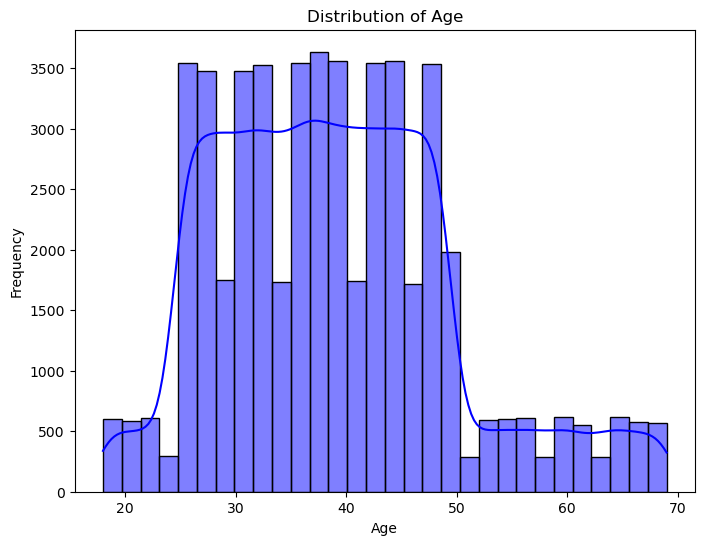

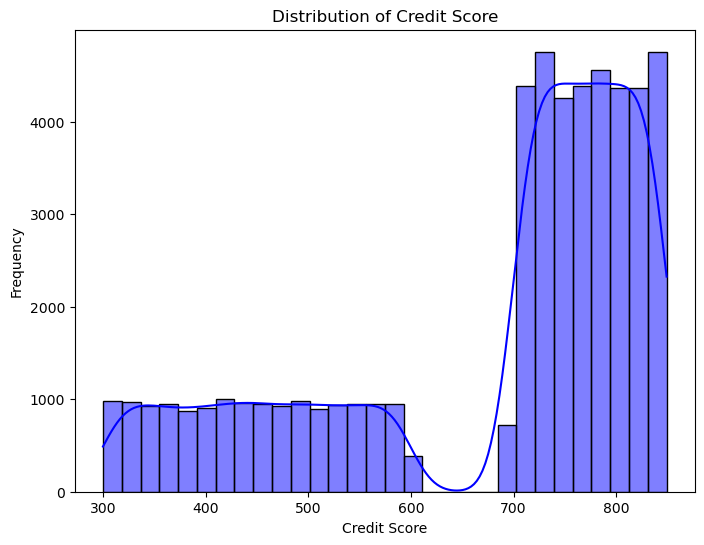

In [25]:
# Distribution Plots to visualize the distribution of numerical features
def plot_histogram(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, bins=30, kde=True, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot for Annual Income
plot_histogram(df, 'Annual_Income', 'Distribution of Annual Income', 'Annual Income', 'Frequency')

# Plot for Age
plot_histogram(df, 'Age', 'Distribution of Age', 'Age', 'Frequency')

# Plot for Credit Score
plot_histogram(df, 'Credit_Score', 'Distribution of Credit Score', 'Credit Score', 'Frequency')


C:\Users\Shiva\AppData\Local\Temp\ipykernel_25684\815879418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=palette)


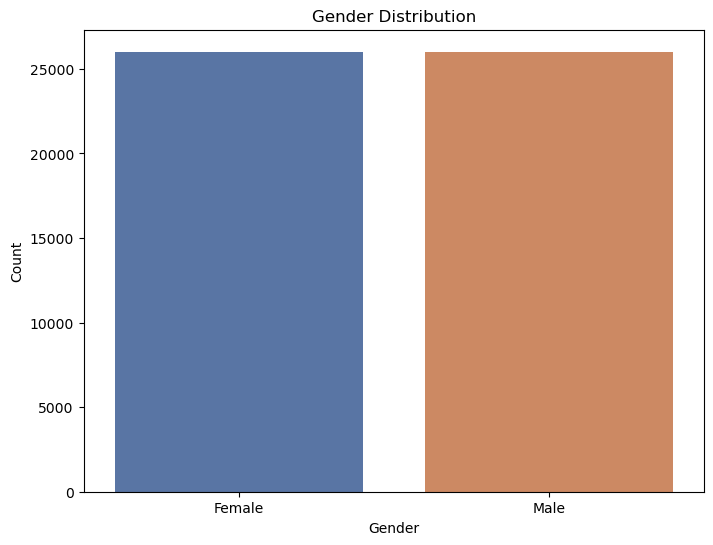

C:\Users\Shiva\AppData\Local\Temp\ipykernel_25684\815879418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=palette)


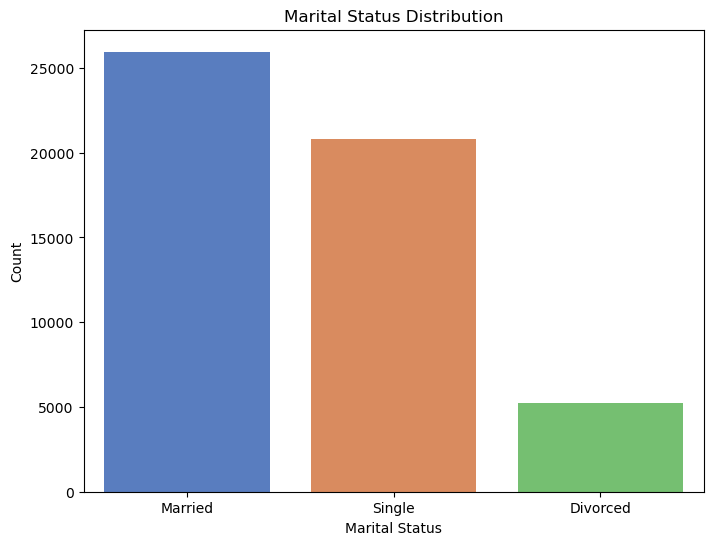

C:\Users\Shiva\AppData\Local\Temp\ipykernel_25684\815879418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=palette)


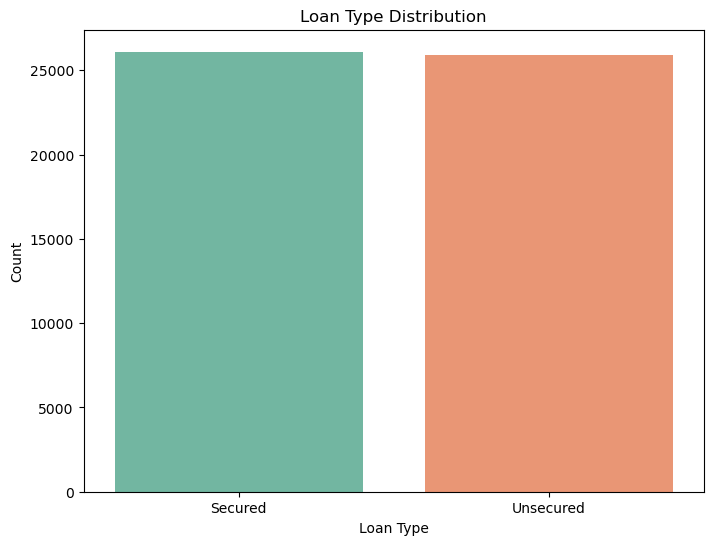

In [26]:
# Count Plots to analyze the frequency of categories in categorical features

def plot_countplot(df, column, title, xlabel, ylabel, palette):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot for Gender
plot_countplot(df, 'Gender', 'Gender Distribution', 'Gender', 'Count', 'deep')

# Plot for Marital_Status
plot_countplot(df, 'Marital_Status', 'Marital Status Distribution', 'Marital Status', 'Count', 'muted')

# Plot for Loan_Type
plot_countplot(df, 'Loan_Type', 'Loan Type Distribution', 'Loan Type', 'Count', 'Set2')

C:\Users\Shiva\AppData\Local\Temp\ipykernel_25684\2438253335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Residential_Status', y='Monthly_Expenses', palette='Set3')


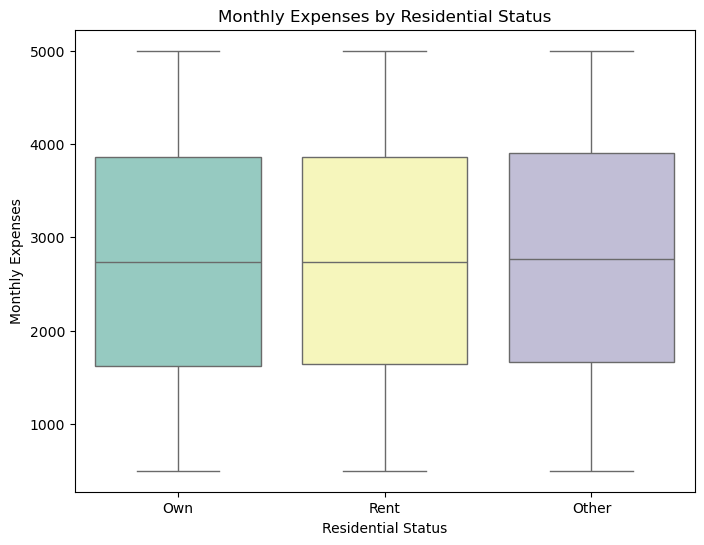

In [27]:
# Box Plots to identify outliers and compare numerical data across categorical groups

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Residential_Status', y='Monthly_Expenses', palette='Set3')
plt.title('Monthly Expenses by Residential Status')
plt.xlabel('Residential Status')
plt.ylabel('Monthly Expenses')
plt.show()

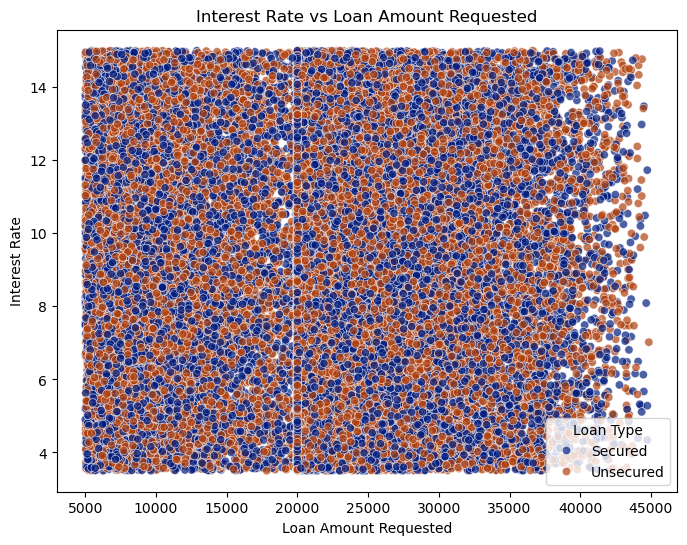

In [29]:
# Scatter Plots to explore relationships between two numerical features

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Loan_Amount_Requested', y='Interest_Rate', hue='Loan_Type', palette='dark', alpha=0.7)
plt.title('Interest Rate vs Loan Amount Requested')
plt.xlabel('Loan Amount Requested')
plt.ylabel('Interest Rate')
plt.legend(title='Loan Type')
plt.show()

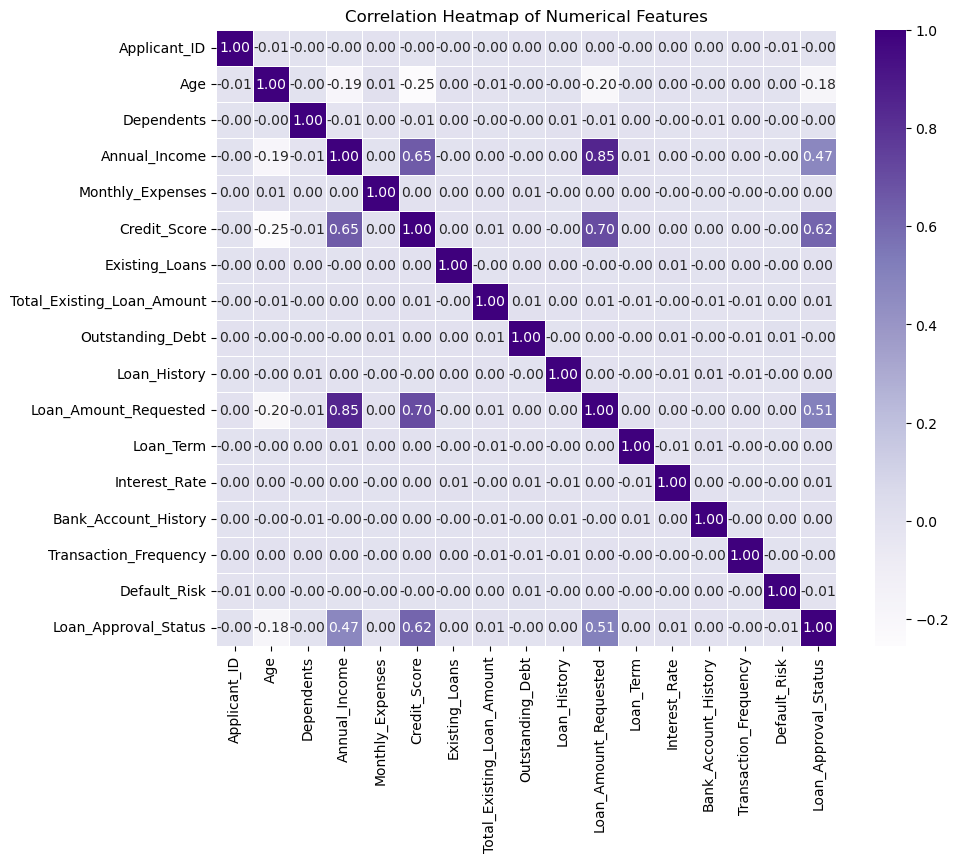

In [32]:
# Heatmaps to visualize correlations among numerical features.

numerical_data = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

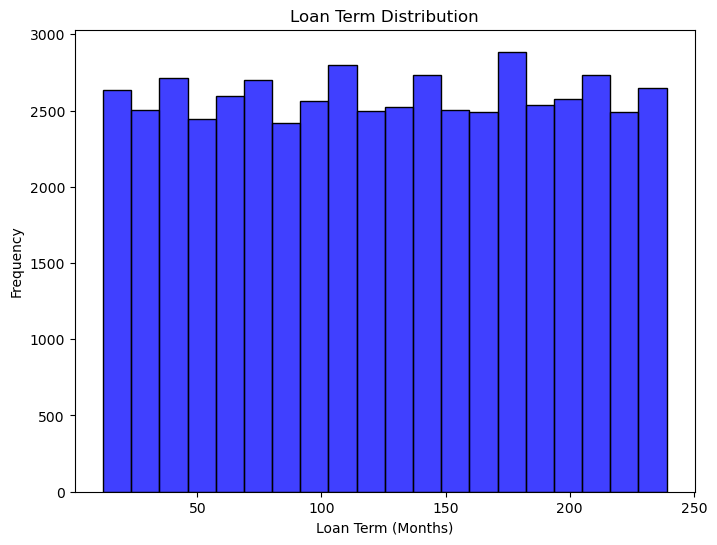

In [33]:
# Histogram to explore the frequency distribution of numerical columns

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Loan_Term', bins=20, kde=False, color='blue')
plt.title('Loan Term Distribution')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Frequency')
plt.show()

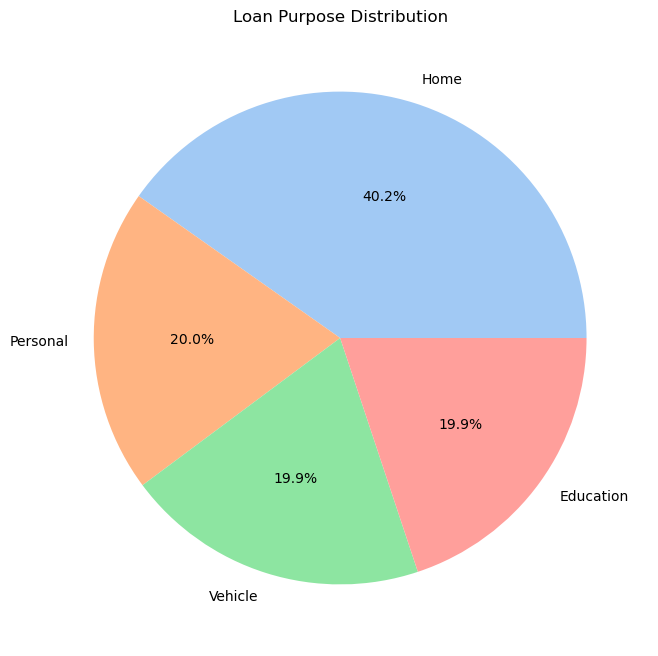

In [34]:
# Pie Charts to visualize the proportion of categories

loan_purpose_counts = df['Loan_Purpose'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Loan Purpose Distribution')
plt.show()

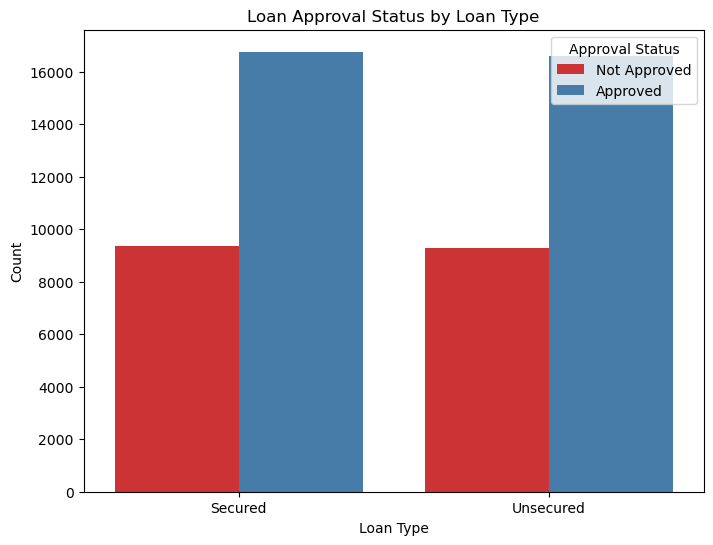

In [35]:
# Comparison Plots to compare approved vs non-approved loans across various features.

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Loan_Type', hue='Loan_Approval_Status', palette='Set1')
plt.title('Loan Approval Status by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.legend(title='Approval Status', loc='upper right', labels=['Not Approved', 'Approved'])
plt.show()

## Data Preprocessing

In [38]:
# dropping unwanted column

df = df.drop(columns='Applicant_ID')

In [44]:
# One Hot Encoding to convert categorical column to numerical column

df = pd.get_dummies(df, drop_first=True)

In [46]:
# Train Test And Split

from sklearn.model_selection import train_test_split

In [51]:
X = df.drop('Loan_Approval_Status', axis=1)
y = df['Loan_Approval_Status']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
# Scaling the Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [62]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

In [64]:
model_results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8556
Random Forest Accuracy: 0.8558
Decision Tree Accuracy: 0.7333
XGBoost Accuracy: 0.8541


## Model Evaluation

In [66]:
best_model_name = max(model_results, key=model_results.get)
best_model_accuracy = model_results[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {best_model_accuracy:.4f}")


Best Model: Random Forest
Accuracy: 0.8558


In [67]:
from sklearn.model_selection import cross_val_score

log_reg_cv = cross_val_score(RandomForestClassifier(), X_train_scaled, y_train, cv=5)
print(f"Logistic Regression Cross-Validation Score: {log_reg_cv.mean()}")

Logistic Regression Cross-Validation Score: 0.8485576923076922
